In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('marketing_data.csv')
data = pd.DataFrame(data)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data['Income'] = data[' Income ']

In [5]:
del data[' Income ']

In [6]:
data['Income'] = data.Income.str.replace('$',"")

C:\Users\Amrutha A\AppData\Local\Temp\ipykernel_24020\3129255005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data.Income.str.replace('$',"")


In [7]:
data['Income'] = data.Income.str.replace(",","")

In [8]:
data.Income.head()

0    84835.00 
1    57091.00 
2    67267.00 
3    32474.00 
4    21474.00 
Name: Income, dtype: object

In [9]:
data['Income'] = pd.to_numeric(data.Income, errors='coerce')

In [10]:
data.Income.head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [12]:
data.Income.isnull().sum()

24

In [13]:
grouped_mean_income = data.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
grouped_mean_income

0       54526.042017
1       51322.182927
2       50800.258741
3       55758.480702
4       51322.182927
            ...     
2235    53096.615385
2236    46201.100000
2237    54526.042017
2238    50800.258741
2239    58138.031579
Name: Income, Length: 2240, dtype: float64

In [14]:
data['Income'] = data['Income'].fillna(grouped_mean_income)

In [15]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,1826,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,...,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,0,0,6/15/14,0,464,5,...,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,0,1,5/13/14,0,134,11,...,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,1,1,5/11/14,0,10,0,...,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,1,0,4/8/14,0,6,16,...,7,1,0,0,0,0,1,0,SP,21474.0
5,7348,1958,PhD,Single,0,0,3/17/14,0,336,130,...,2,0,0,0,0,0,1,0,SP,71691.0
6,4073,1954,2n Cycle,Married,0,0,1/29/14,0,769,80,...,6,1,0,0,0,0,1,0,GER,63564.0
7,1991,1967,Graduation,Together,0,1,1/18/14,0,78,0,...,5,0,0,0,0,0,0,0,SP,44931.0
8,4047,1954,PhD,Married,0,1,1/11/14,0,384,0,...,4,0,0,0,0,0,0,0,US,65324.0
9,9477,1954,PhD,Married,0,1,1/11/14,0,384,0,...,4,0,0,0,0,0,0,0,IND,65324.0


In [16]:
data['No_Kids'] = data['Kidhome'] + data['Teenhome']
data['Age'] = 2023 - data['Year_Birth']
data['Total_Spent'] = data['MntWines'] + data['MntSweetProducts'] + data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + data['MntMeatProducts']

In [17]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,No_Kids,Age,Total_Spent
0,1826,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,...,0,0,0,1,0,SP,84835.0,0,53,1190
1,1,1961,Graduation,Single,0,0,6/15/14,0,464,5,...,0,0,1,1,0,CA,57091.0,0,62,577
2,10476,1958,Graduation,Married,0,1,5/13/14,0,134,11,...,0,0,0,0,0,US,67267.0,1,65,251
3,1386,1967,Graduation,Together,1,1,5/11/14,0,10,0,...,0,0,0,0,0,AUS,32474.0,2,56,11
4,5371,1989,Graduation,Single,1,0,4/8/14,0,6,16,...,0,0,0,1,0,SP,21474.0,1,34,91
5,7348,1958,PhD,Single,0,0,3/17/14,0,336,130,...,0,0,0,1,0,SP,71691.0,0,65,1192
6,4073,1954,2n Cycle,Married,0,0,1/29/14,0,769,80,...,0,0,0,1,0,GER,63564.0,0,69,1215
7,1991,1967,Graduation,Together,0,1,1/18/14,0,78,0,...,0,0,0,0,0,SP,44931.0,1,56,96
8,4047,1954,PhD,Married,0,1,1/11/14,0,384,0,...,0,0,0,0,0,US,65324.0,1,69,544
9,9477,1954,PhD,Married,0,1,1/11/14,0,384,0,...,0,0,0,0,0,IND,65324.0,1,69,544


In [18]:
data['Total_purchase'] = data['NumCatalogPurchases']+data['NumDealsPurchases']+data['NumStorePurchases']+data['NumWebPurchases']

In [19]:
num_data = data.select_dtypes(include=np.number)

In [20]:
num_data.columns

Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Income', 'No_Kids', 'Age',
       'Total_Spent', 'Total_purchase'],
      dtype='object')

In [21]:
del num_data['ID']
num_data

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,No_Kids,Age,Total_Spent,Total_purchase
0,1970,0,0,0,189,104,379,111,189,218,...,0,0,0,1,0,84835.0,0,53,1190,15
1,1961,0,0,0,464,5,64,7,0,37,...,0,0,1,1,0,57091.0,0,62,577,18
2,1958,0,1,0,134,11,59,15,2,30,...,0,0,0,0,0,67267.0,1,65,251,11
3,1967,1,1,0,10,0,1,0,0,0,...,0,0,0,0,0,32474.0,2,56,11,4
4,1989,1,0,0,6,16,24,11,0,34,...,0,0,0,1,0,21474.0,1,34,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,0,1,99,372,18,126,47,48,78,...,0,0,0,0,0,66476.0,1,47,689,20
2236,1977,1,0,99,5,10,13,3,8,16,...,0,0,0,0,0,31056.0,1,46,55,5
2237,1976,1,0,99,185,2,88,15,5,14,...,0,0,0,0,0,46310.0,1,47,309,14
2238,1978,0,0,99,267,38,701,149,165,63,...,0,0,0,0,0,65819.0,0,45,1383,20


In [23]:
num_data.columns

Index(['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Income', 'No_Kids', 'Age',
       'Total_Spent', 'Total_purchase'],
      dtype='object')

In [24]:
new_num_data = pd.DataFrame()

In [25]:
for col in ['Year_Birth','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases','NumWebVisitsMonth','Income']:
    new_num_data[col] = num_data[col]

In [26]:
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = column.median()
    
    return column.apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Apply the function to each numeric column
num_data_cleaned = new_num_data.copy()
num_data_cleaned = num_data_cleaned.apply(replace_outliers_with_median)


In [28]:
num_data_cleaned.describe()

,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Income
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.903125,285.683259,14.281250,112.670089,21.314286,13.855804,30.015625,2.062054,4.046429,2.541964,5.274107,51640.809539
std,11.694144,310.279574,18.719299,135.044047,27.831455,18.117876,28.751608,1.340004,2.625941,2.630095,2.303046,20567.631044
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
25%,1959.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,35538.750000
50%,1970.000000,173.250000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,6.000000,51377.250000
75%,1977.000000,479.000000,19.000000,153.000000,28.000000,18.000000,40.250000,3.000000,6.000000,4.000000,7.000000,68098.250000
max,1996.000000,1224.000000,81.000000,555.000000,120.000000,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,113734.000000


In [34]:
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = column.median()
    
    return column.apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Apply the function to each numeric column
num_data_cleaned = num_data_cleaned.apply(replace_outliers_with_median)

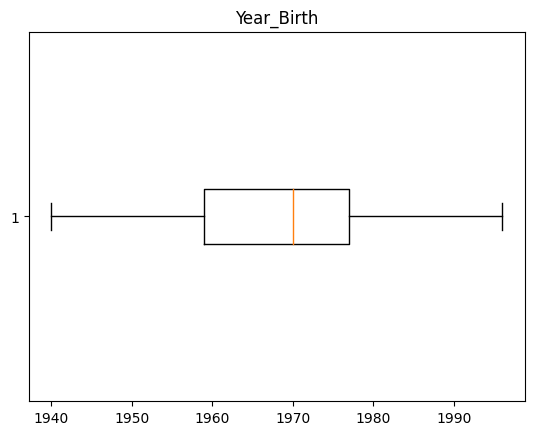

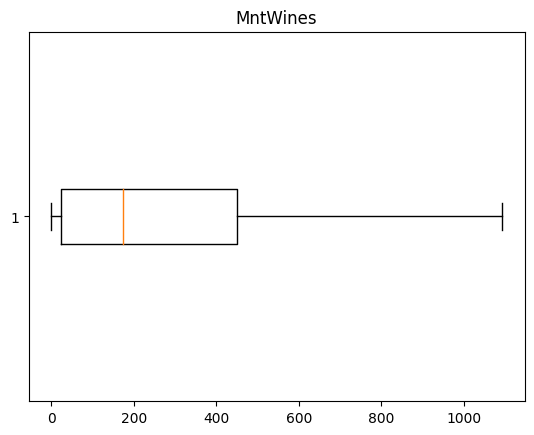

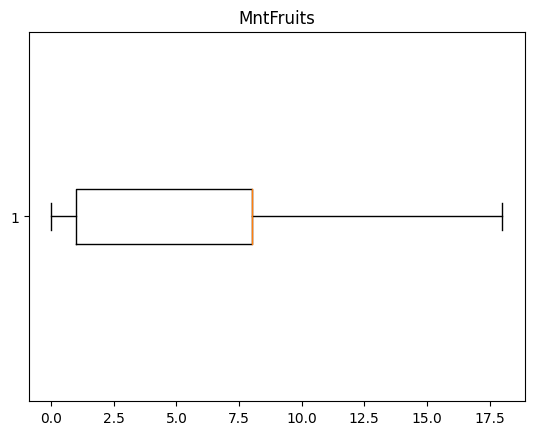

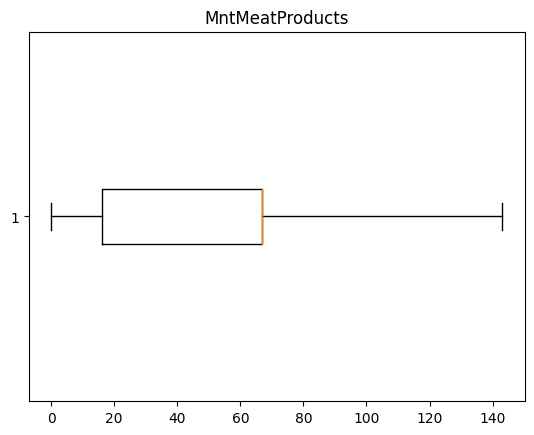

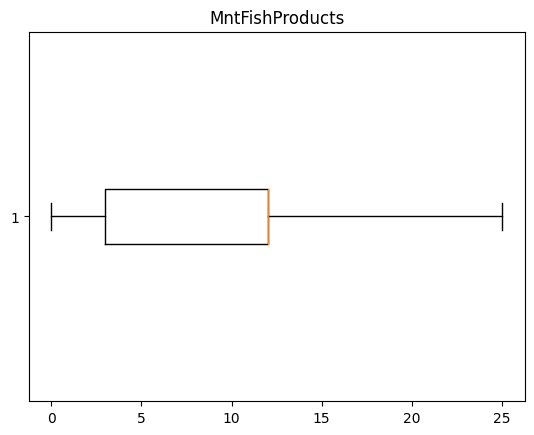

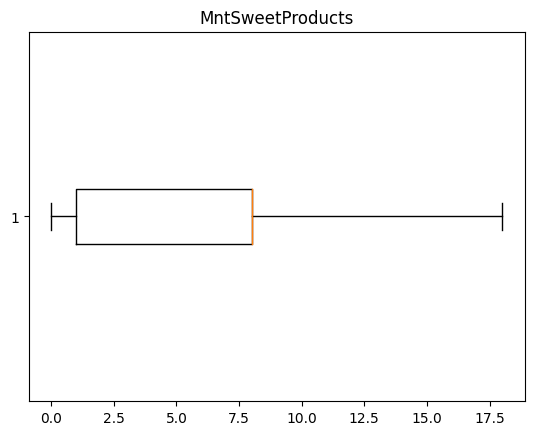

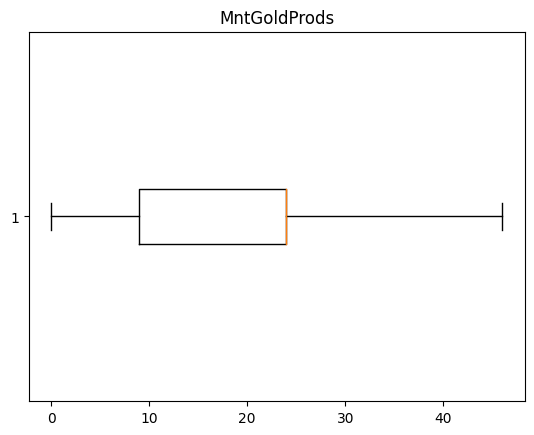

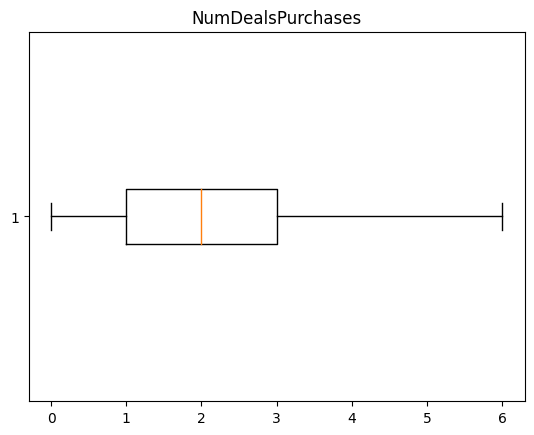

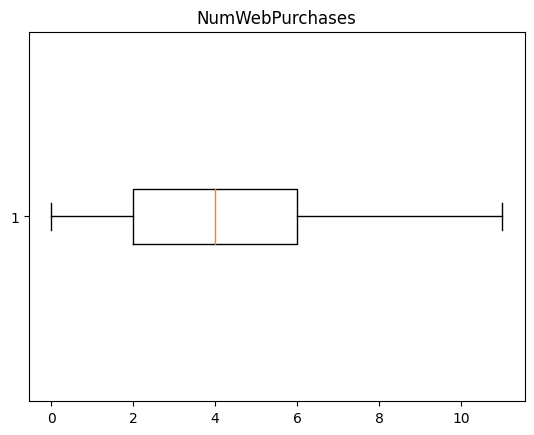

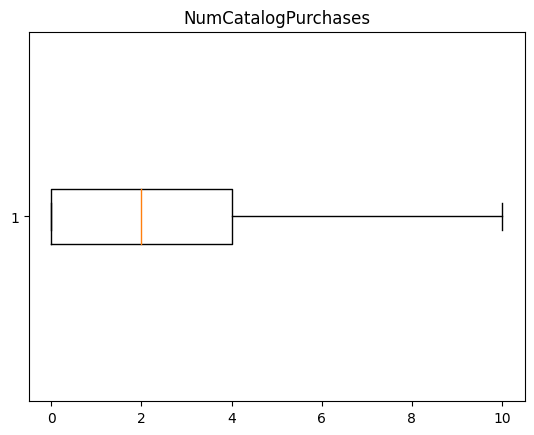

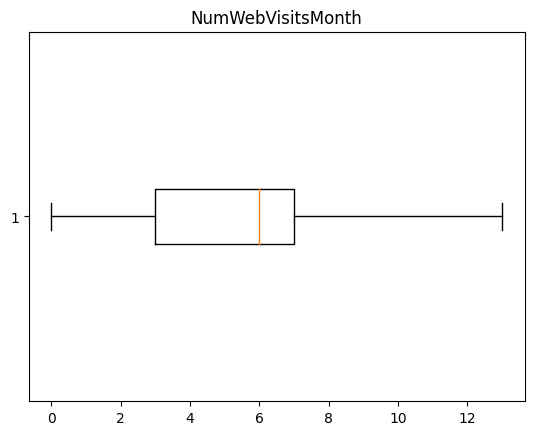

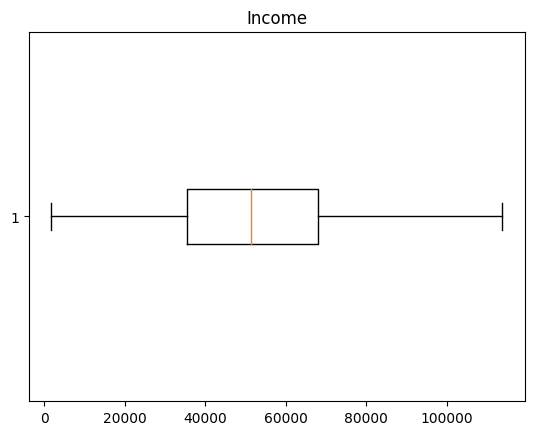

In [35]:
for col in num_data_cleaned.columns:
    plt.boxplot(num_data_cleaned[col], vert=False)
    plt.title(col)
    plt.show()

In [36]:
obj_data = data.select_dtypes(include="object")
obj_data.columns

Index(['Education', 'Marital_Status', 'Dt_Customer', 'Country'], dtype='object')

In [37]:
del obj_data['Dt_Customer']

# Applying one-hot encoding

In [38]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

c:\Users\Amrutha A\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [39]:
ordinal = ['Education']

nominal = ['Marital_Status','Country']


In [40]:
ordinal_encoder = OrdinalEncoder()
obj_data[ordinal] = ordinal_encoder.fit_transform(data[ordinal])

c:\Users\Amrutha A\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [41]:
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(obj_data[nominal])

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal))


In [42]:
one_obj_data = pd.concat([obj_data, onehot_df], axis=1)

In [43]:
one_obj_data = obj_data.drop(nominal, axis=1)

In [44]:
one_obj_data

,Education
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
2235,4.0
2236,0.0
2237,2.0
2238,2.0


In [45]:
obj_data.head()

,Education,Marital_Status,Country
0,2.0,Divorced,SP
1,2.0,Single,CA
2,2.0,Married,US
3,2.0,Together,AUS
4,2.0,Single,SP


<AxesSubplot:>

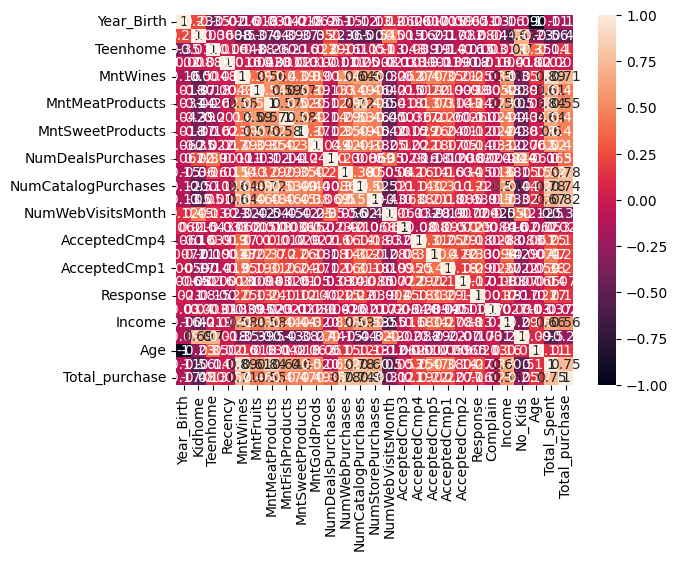

In [46]:
import seaborn as sns

sns.heatmap(num_data.corr(),annot=True)

In [47]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 30, 50, 100], labels=['18-30', '30-50', '50+'])

In [48]:
data['ShoppingPreference'] = ['Web' if web > store else 'Store' for web, store in zip(data['NumWebPurchases'], data['NumStorePurchases'])]

In [49]:
from scipy.stats import chi2_contingency

In [50]:
contingency_table = pd.crosstab(data['AgeGroup'], data['ShoppingPreference'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [51]:
print(p)

0.05886133102718724


In [52]:
data['HasChildren'] = ['Yes' if total > 0 else 'No' for total in data['No_Kids']]

In [53]:
contingency_table = pd.crosstab(data['HasChildren'], data['ShoppingPreference'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)

1.0936040498993082e-05


In [54]:
from scipy.stats import pearsonr

# Correlation between online and in-store purchases
corr, p = pearsonr(data['NumWebPurchases'], data['NumStorePurchases'])

In [55]:
print(corr, p)

0.502713413299732 8.962802398070662e-144


In [56]:
from scipy.stats import ttest_ind

In [59]:
usa_data = data[data['Country'] == 'US']['Total_purchase']
rest_of_world_data = data[data['Country'] != 'US']['Total_purchase']

# Perform t-test
t_stat, p_value = ttest_ind(usa_data, rest_of_world_data)

In [60]:
print(p_value)

0.07121562869350608


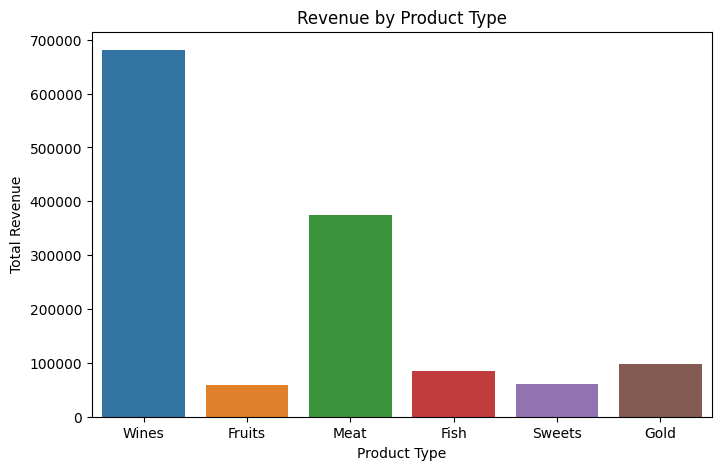

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total revenue for each product
product_revenue = {
    'Wines': data['MntWines'].sum(),
    'Fruits': data['MntFruits'].sum(),
    'Meat': data['MntMeatProducts'].sum(),
    'Fish': data['MntFishProducts'].sum(),
    'Sweets': data['MntSweetProducts'].sum(),
    'Gold': data['MntGoldProds'].sum()
}

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(product_revenue.keys()), y=list(product_revenue.values()))
plt.title('Revenue by Product Type')
plt.ylabel('Total Revenue')
plt.xlabel('Product Type')
plt.show()


In [72]:
data['Response']

0       1
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

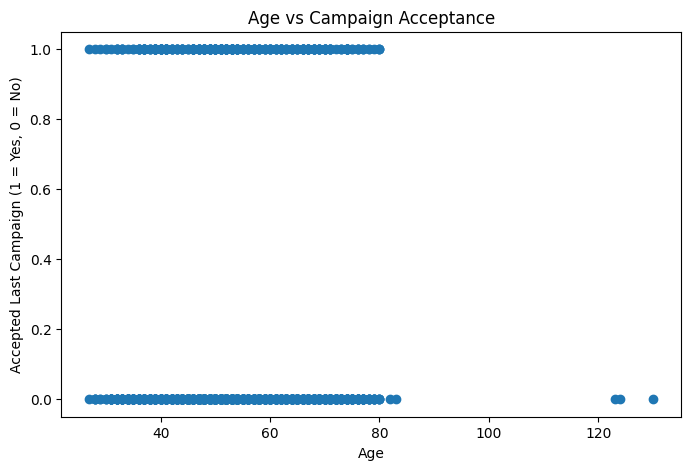

In [75]:

data['Age'] = 2023 - data['Year_Birth']

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(data['Age'], data['Response'])
plt.title('Age vs Campaign Acceptance')
plt.xlabel('Age')
plt.ylabel('Accepted Last Campaign (1 = Yes, 0 = No)')
plt.show()

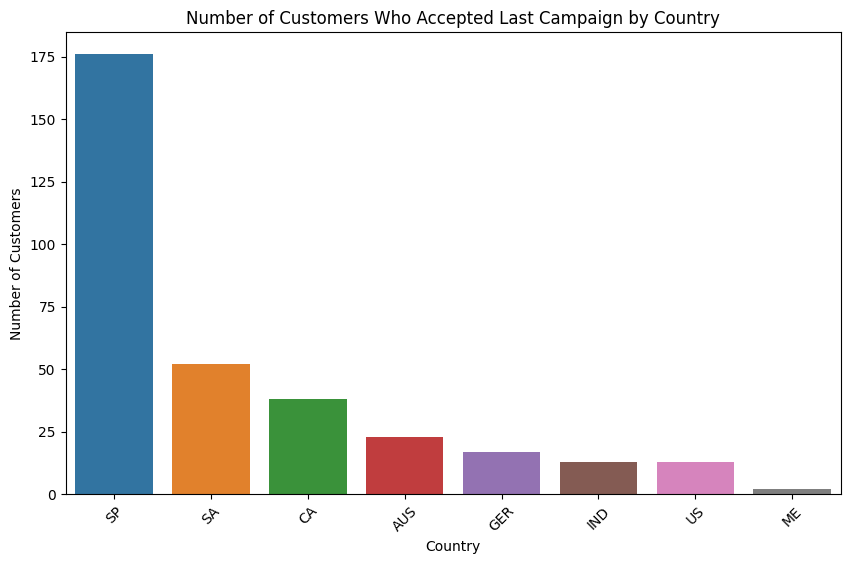

In [65]:
accepted_customers = data[data['Response'] == 1]

# Count customers by country
country_acceptance = accepted_customers['Country'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=country_acceptance.index, y=country_acceptance.values)
plt.title('Number of Customers Who Accepted Last Campaign by Country')
plt.ylabel('Number of Customers')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

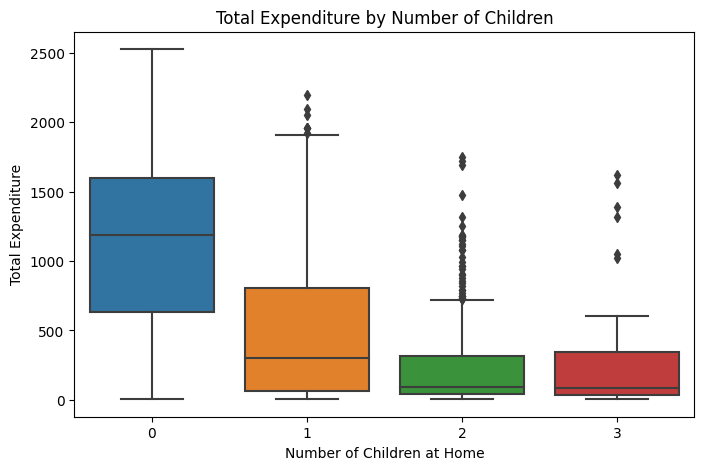

In [67]:
data['TotalChildren'] = data['Kidhome'] + data['Teenhome']
data['TotalExpenditure'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
plt.figure(figsize=(8, 5))
sns.boxplot(x='TotalChildren', y='TotalExpenditure', data=data)
plt.title('Total Expenditure by Number of Children')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.show()

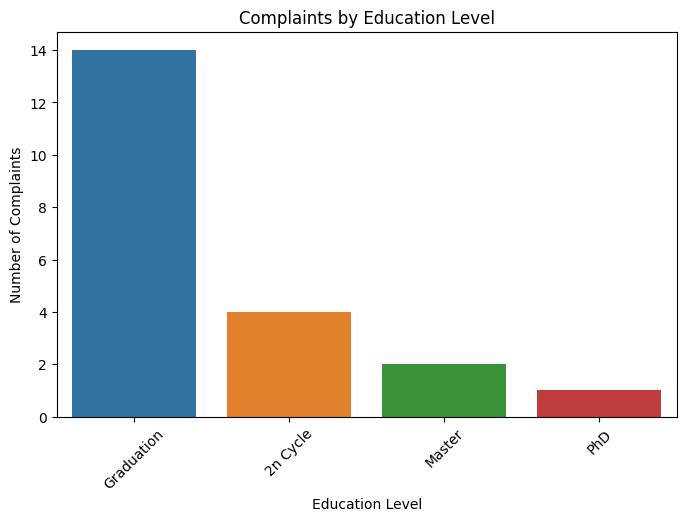

In [68]:
complaints_data = data[data['Complain'] == 1]

# Count complaints by education level
education_complaints = complaints_data['Education'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=education_complaints.index, y=education_complaints.values)
plt.title('Complaints by Education Level')
plt.ylabel('Number of Complaints')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()